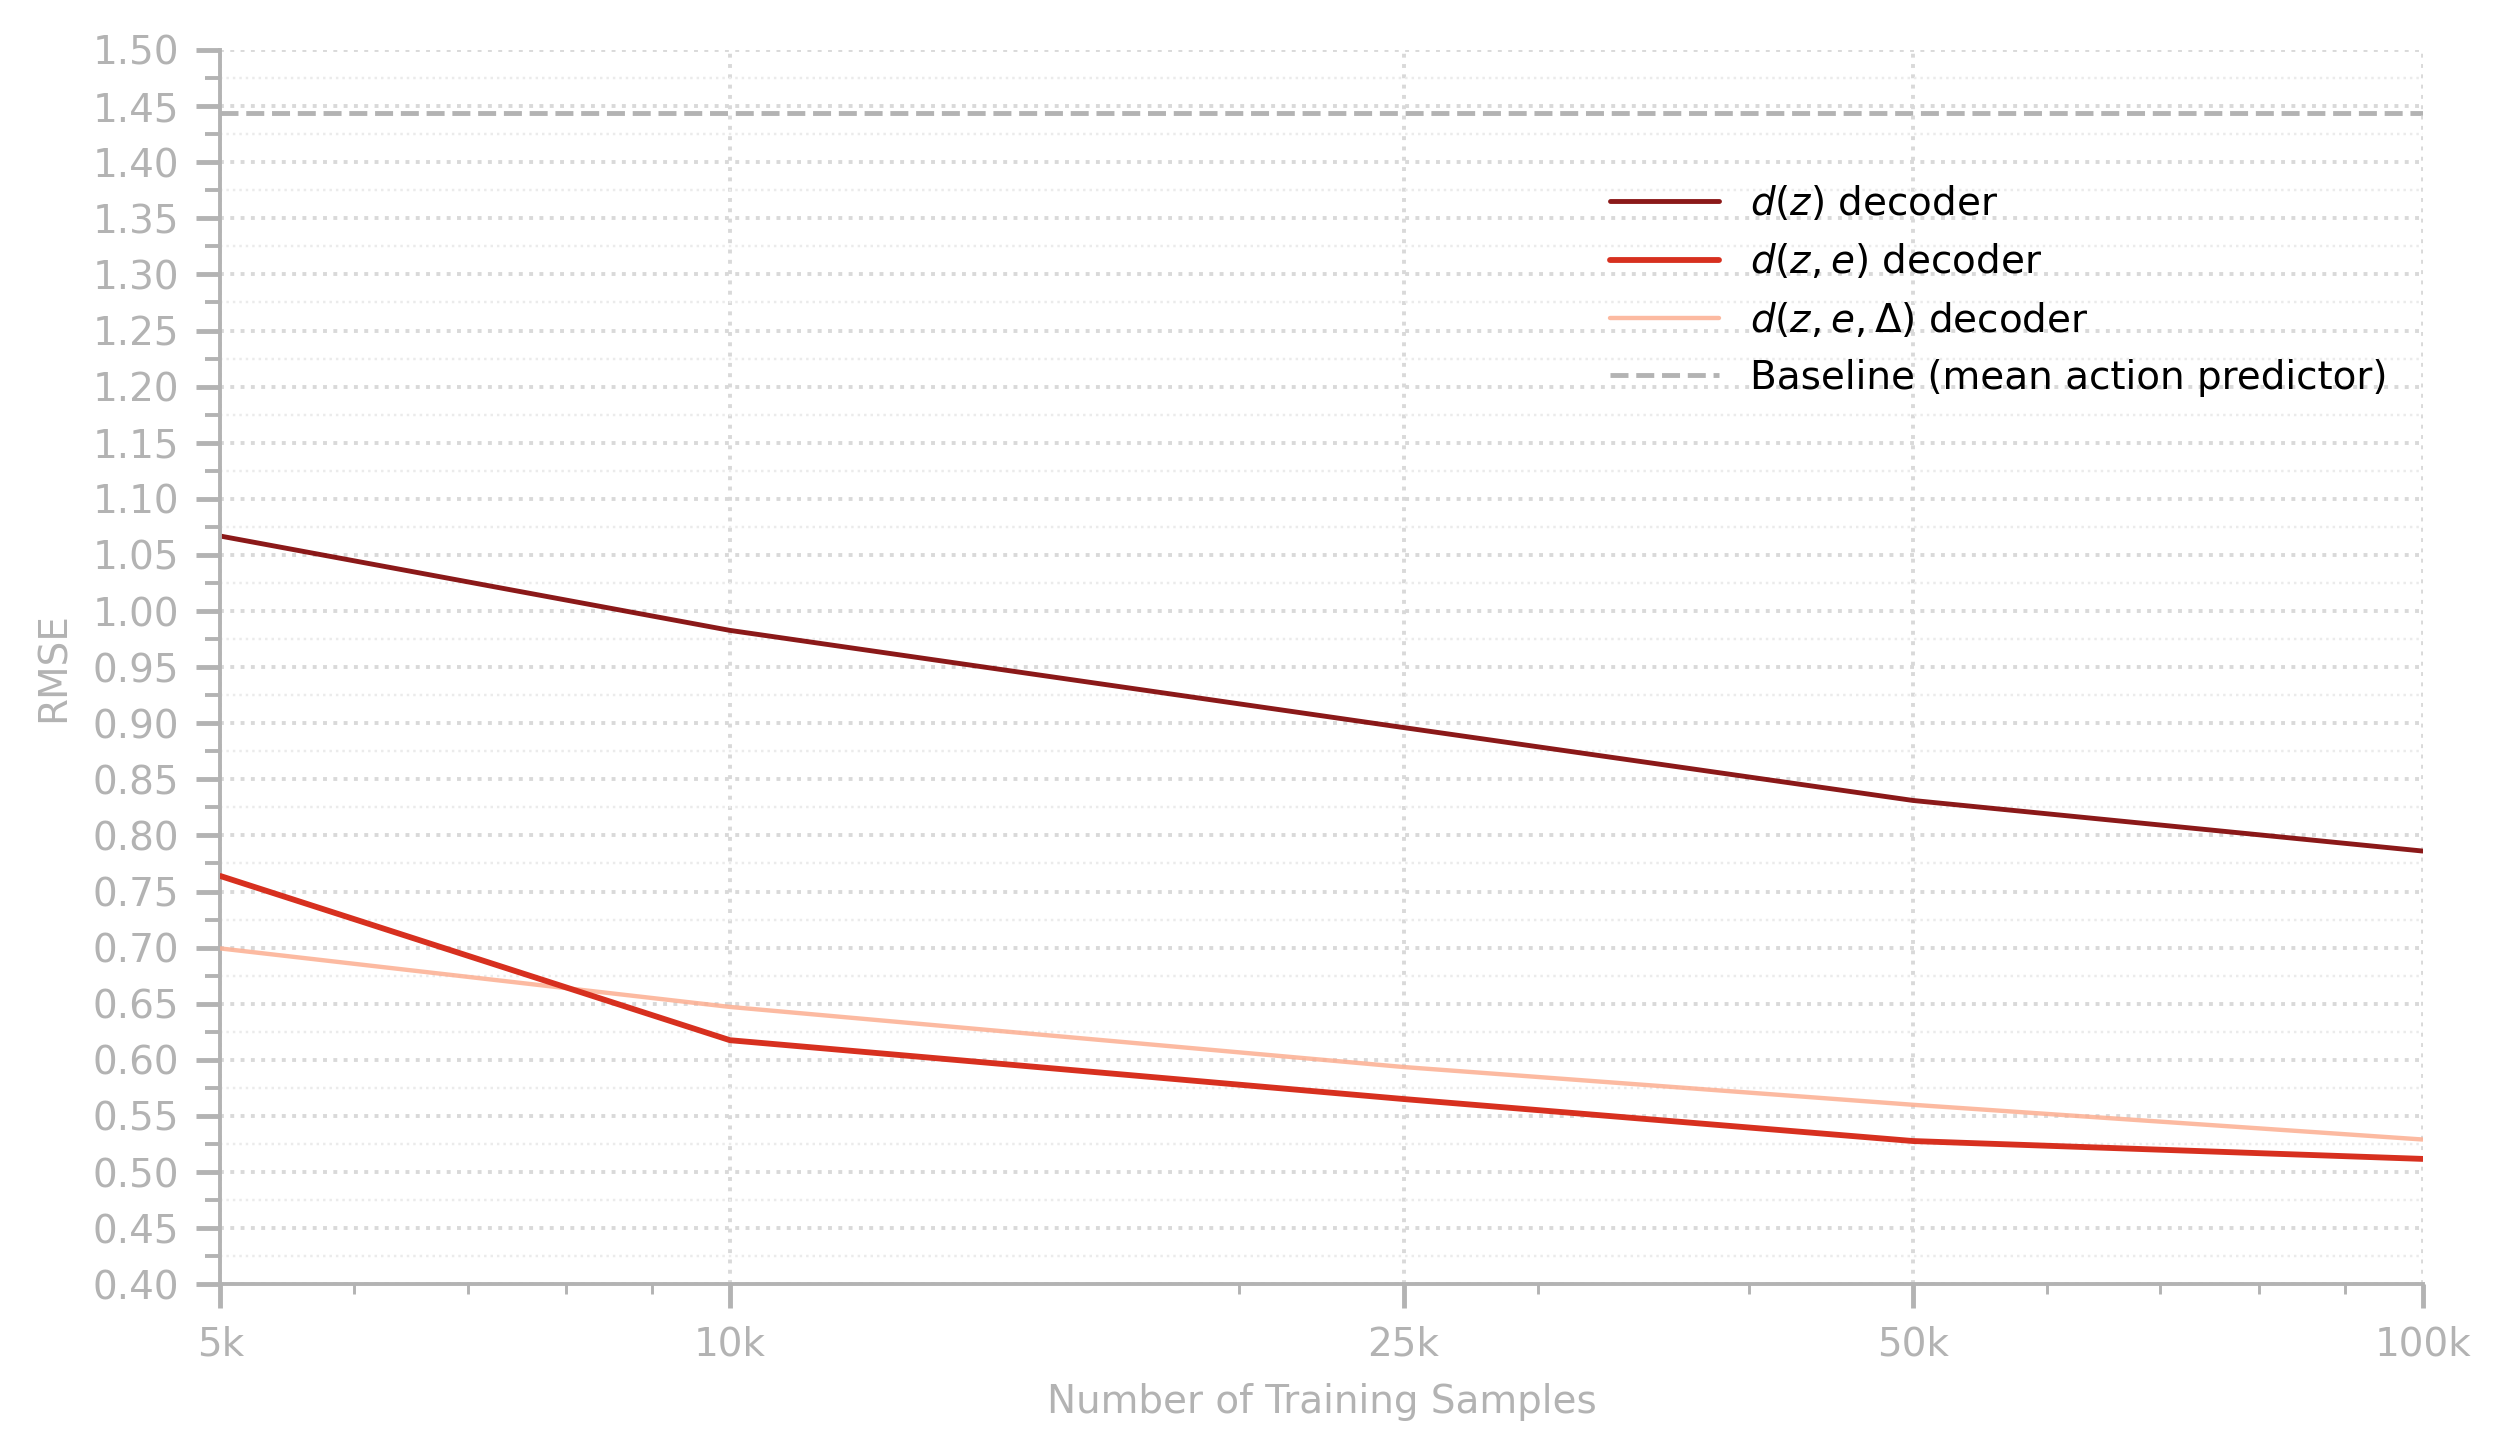

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# -----------------------
# Data
# -----------------------
dataset_sizes = np.array([5_000, 10_000, 25_000, 50_000, 100_000])

decoder_z = np.array([1.066811, 0.982730, 0.896134, 0.831142, 0.786076])
decoder_z_e = np.array([0.763820, 0.617489, 0.565066, 0.527619, 0.511698])
decoder_full = np.array([0.699275, 0.647143, 0.593594, 0.559930, 0.528988])

series = [
    (r"$d(z)$ decoder", decoder_z),
    (r"$d(z,e)$ decoder", decoder_z_e),
    (r"$d(z,e,\Delta)$ decoder", decoder_full),
]


colors = {
    r"$d(z)$ decoder": "#7f0000",
    r"$d(z,e)$ decoder": "#d7301f",
    r"$d(z,e,\Delta)$ decoder": "#fcae91",
}

linewidths = {
    r"$d(z)$ decoder": 1.0,
    r"$d(z,e)$ decoder": 1.2,
    r"$d(z,e,\Delta)$ decoder": 0.9,
}

alphas = {
    r"$d(z)$ decoder": 0.9,
    r"$d(z,e)$ decoder": 1.0,
    r"$d(z,e,\Delta)$ decoder": 0.85,
}

zorders = {
    r"$d(z)$ decoder": 2,
    r"$d(z,e,\Delta)$ decoder": 3,
    r"$d(z,e)$ decoder": 4,  # B explicitly in front of C
}


baseline_low_bound = 1.444

# -----------------------
# Style
# -----------------------
plt.rcParams.update({
    "figure.dpi": 350,
    "savefig.dpi": 350,
    "font.size": 8,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 8,
    "lines.solid_capstyle": "round",
    "lines.solid_joinstyle": "round",
})

fig, ax = plt.subplots(figsize=(7.2, 4.2))

# -----------------------
# Curves
# -----------------------
for name, y in series:
    ax.plot(
        dataset_sizes,
        y,
        linewidth=linewidths[name],
        color=colors[name],
        alpha=alphas[name],
        zorder=zorders[name],
        label=name,
    )


# Baseline
ax.axhline(
    baseline_low_bound,
    linestyle="--",
    linewidth=1.0,
    color="0.7",
    alpha=1.0,
    zorder=0,
    label="Baseline (mean action predictor)",
)

# -----------------------
# Axes
# -----------------------
ax.set_xscale("log")
ax.set_xlim(dataset_sizes[0], dataset_sizes[-1])
ax.set_ylim(0.4, 1.5)

ax.set_xticks(dataset_sizes)
ax.set_xticklabels([f"{int(s/1000)}k" for s in dataset_sizes])

ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Grid
ax.grid(True, which="major", axis="both", linestyle=":", linewidth=0.8, color="0.85")
ax.grid(True, which="minor", axis="y", linestyle=":", linewidth=0.5, color="0.92")
axis_grey = "0.7"

# Axis spines
ax.spines["left"].set_color(axis_grey)
ax.spines["bottom"].set_color(axis_grey)

# Tick marks
ax.tick_params(axis="both", which="both", colors=axis_grey)

# Axis labels slightly darker for readability
ax.xaxis.label.set_color("0.4")
ax.yaxis.label.set_color("0.4")

# Labels
ax.set_xlabel("Number of Training Samples", fontsize=8, color="0.7")
ax.set_ylabel("RMSE", fontsize=8, color="0.7")

#ax.set_title("RMSE vs. Dataset Size", fontsize=8, pad=6)
#ax.title.set_color("0.35")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(axis="both", which="major", length=5, width=1)
ax.tick_params(axis="y", which="minor", length=3, width=0.8)

ax.margins(y=0.05)

ax.legend(
    frameon=False,
    loc="upper right",
    bbox_to_anchor=(1.0, 0.92),  # ↓ move legend down a bit
    handlelength=2.8,
)


fig.tight_layout()
plt.show()



fig.savefig(
    "rmse_vs_dataset_size.png",
    dpi=600,
    bbox_inches="tight",
    transparent=True,
)

